In [54]:
import sys

bin_path = '../../functions'
if bin_path not in sys.path:
    sys.path.insert(1, '../../functions')
    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from epiweeks import Week
from datetime import timedelta
import matplotlib.dates as mdates
import format_data as fd

In [65]:
def counts_to_frequency(counts, total_counts):
    # Function for getting frequencies from counts and total_counts
    if 'lineage' in counts.columns:
        epiweeks = counts.drop(['lineage'], axis = 1).columns
    else:
        epiweeks = counts.columns
    neutral_frequency = (counts[epiweeks].values/total_counts[epiweeks].values)
    neutral_frequency = pd.DataFrame(data = neutral_frequency, columns = epiweeks)
    return neutral_frequency

Load inference data

In [67]:
summary = pd.read_csv('../../data/lineages/delta/delta_sublineage50.5+58.5/is_pillar_2/England/inference_results/summary.csv', index_col = 0)
raw = pd.read_csv('../../data/lineages/delta/delta_sublineage50.5+58.5/is_pillar_2/England/inference_results/raw.csv', index_col = 0)

Plot results

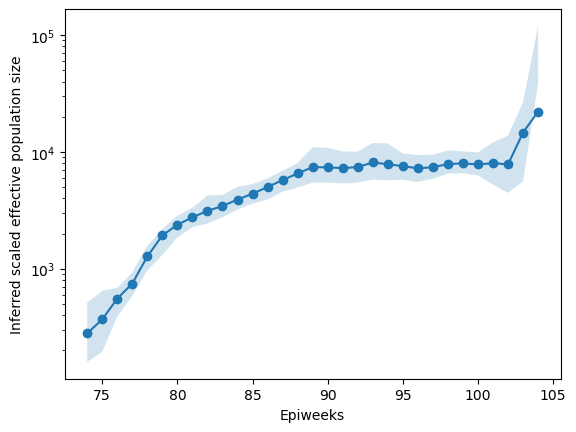

In [79]:
plt.plot(summary['Epiweek'], summary['Netau_HMM_median'], marker = 'o')
plt.fill_between(summary['Epiweek'], summary['Netau_HMM_95%_ci_lower'], summary['Netau_HMM_95%_ci_upper'], alpha = 0.2)
plt.xlabel('Epiweeks')
plt.ylabel('Inferred scaled effective population size')
plt.yscale('log')
plt.show()

Plot raw results

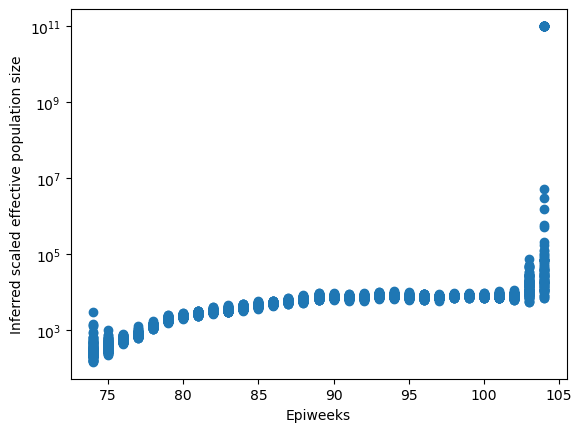

In [80]:
plt.scatter(raw['epiweek_middle'], raw['Netau_HMM'])
plt.xlabel('Epiweeks')
plt.ylabel('Inferred scaled effective population size')
plt.yscale('log')
plt.show()

We see that the inferred effective population size becomes very high $>10^5$) which is usually a sign that there wasn't convergence in the HMM

Look at the lineage frequency time series (after creating coarse-grained lineages)

/Users/qinqinyu/Documents/hallatschek_lab/projects/sars-cov-2_genetic_drift/analysis_scripts/model_checking/../../functions/format_data.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(summed_rows, ignore_index = True)
/Users/qinqinyu/Documents/hallatschek_lab/projects/sars-cov-2_genetic_drift/analysis_scripts/model_checking/../../functions/format_data.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows_freq = new_rows_freq.append(summed_rows_freq, ignore_index = True)
/Users/qinqinyu/Documents/hallatschek_lab/projects/sars-cov-2_genetic_drift/analysis_scripts/model_checking/../../functions/format_data.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(su

['100' '101' '102' '103' '104' '105' '106' '107' '108']
[datetime.date(2021, 11, 24) datetime.date(2021, 12, 1)
 datetime.date(2021, 12, 8) datetime.date(2021, 12, 15)
 datetime.date(2021, 12, 22) datetime.date(2021, 12, 29)
 datetime.date(2022, 1, 5) datetime.date(2022, 1, 12)
 datetime.date(2022, 1, 19)]


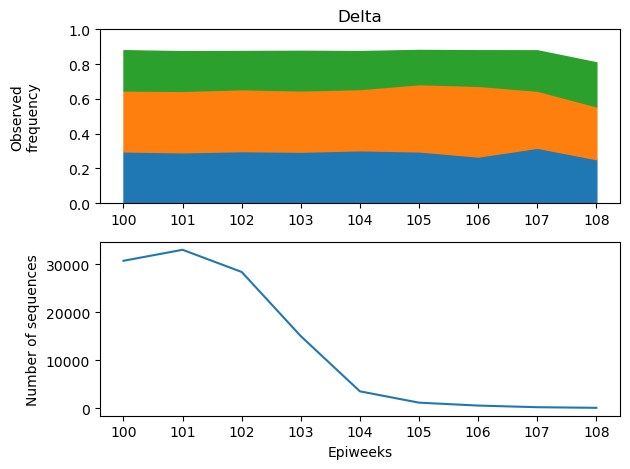

In [83]:
mincount = 20
minfreq = 0.01

# Delta
path_folder = '../../data/lineages/delta/delta_sublineage50.5+58.5/is_pillar_2/England/'
counts_all = pd.read_csv(path_folder + 'counts_lineages.csv', index_col = 0)
total_assigned_counts = pd.read_csv(path_folder + 'total_counts_lineages.csv', index_col = 0)

epiweeks = np.arange(100, 109).astype('str')
d1=epiweeks[0]
dl=epiweeks[-1]

# Get data from this time window
counts = counts_all[epiweeks]
counts = counts.loc[~(counts==0).all(axis=1)] # Drop any lineages that have 0 counts throughout the time window
total_sampled_counts = total_assigned_counts[epiweeks]

neutral_frequency = counts_to_frequency(counts, total_sampled_counts)

# Creating superlineages and formatting the data
counts, neutral_frequency = fd.create_superlineages_counts_and_freq(counts, total_sampled_counts, d1, dl, mincount, minfreq, seed = np.random.randint(10**5))

fig, ax = plt.subplots(2,1)
ax[0].stackplot(epiweeks.astype('int'), neutral_frequency[epiweeks], edgecolor = 'face')
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('Observed\nfrequency')
ax[0].set_title('Delta')

ax[1].plot(epiweeks.astype('int'), total_assigned_counts[epiweeks].values[0])
ax[1].set_xlabel('Epiweeks')
ax[1].set_ylabel('Number of sequences')

fig.align_ylabels(ax)
plt.tight_layout()

dates = []
for w in epiweeks:
    w = int(np.floor(float(w)))
    if w<=53:
        week = Week(2020, w)
    elif (w>53)&(w<=105):
        week = Week(2021, w-53)
    else:
        week = Week(2022, w-53-52)
    dates.append(week.startdate()+timedelta(days=3))
dates = np.array(dates)

print(epiweeks)
print(dates)

The number of coarse-grained lineages is only 3, which is very low, which implies that the number of counts is very low at one of the timepoints (likely the final timepoint)

In [84]:
total_assigned_counts

,17,18,19,20,21,22,23,24,25,26,...,106,107,108,109,110,111,112,113,114,115
0,0,0,0,0,0,0,0,0,0,0,...,548,207,79,27,20,7,9,3,0,0


Indeed the number of counts is only 79 at epiweek 108 (January 5, 2022), which would lead to at most 3 coarse-grained lineages (since each coarse-grained lineage has to have at least 20 counts)

In comparison, we can check the number of coarse-grained lineages in the window that is 2 weeks earlier

/Users/qinqinyu/Documents/hallatschek_lab/projects/sars-cov-2_genetic_drift/analysis_scripts/model_checking/../../functions/format_data.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(summed_rows, ignore_index = True)
/Users/qinqinyu/Documents/hallatschek_lab/projects/sars-cov-2_genetic_drift/analysis_scripts/model_checking/../../functions/format_data.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows_freq = new_rows_freq.append(summed_rows_freq, ignore_index = True)
/Users/qinqinyu/Documents/hallatschek_lab/projects/sars-cov-2_genetic_drift/analysis_scripts/model_checking/../../functions/format_data.py:82: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(su

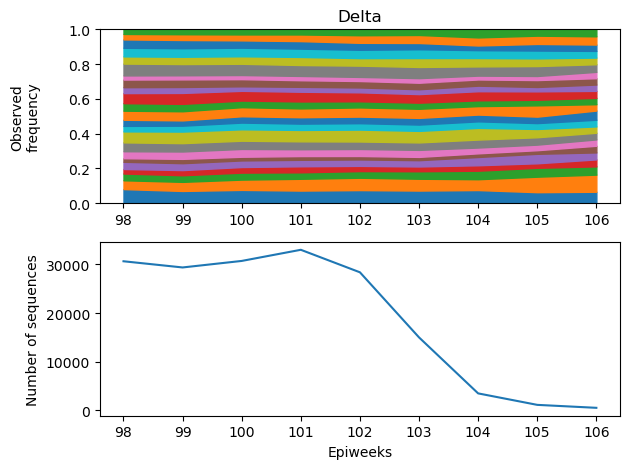

In [85]:
mincount = 20
minfreq = 0.01

# Delta
path_folder = '../../data/lineages/delta/delta_sublineage50.5+58.5/is_pillar_2/England/'
counts_all = pd.read_csv(path_folder + 'counts_lineages.csv', index_col = 0)
total_assigned_counts = pd.read_csv(path_folder + 'total_counts_lineages.csv', index_col = 0)

epiweeks = np.arange(98, 107).astype('str')
d1=epiweeks[0]
dl=epiweeks[-1]

# Get data from this time window
counts = counts_all[epiweeks]
counts = counts.loc[~(counts==0).all(axis=1)] # Drop any lineages that have 0 counts throughout the time window
total_sampled_counts = total_assigned_counts[epiweeks]

neutral_frequency = counts_to_frequency(counts, total_sampled_counts)

# Creating superlineages and formatting the data
counts, neutral_frequency = fd.create_superlineages_counts_and_freq(counts, total_sampled_counts, d1, dl, mincount, minfreq, seed = np.random.randint(10**5))

fig, ax = plt.subplots(2,1)
ax[0].stackplot(epiweeks.astype('int'), neutral_frequency[epiweeks], edgecolor = 'face')
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('Observed\nfrequency')
ax[0].set_title('Delta')

ax[1].plot(epiweeks.astype('int'), total_assigned_counts[epiweeks].values[0])
ax[1].set_xlabel('Epiweeks')
ax[1].set_ylabel('Number of sequences')

fig.align_ylabels(ax)
plt.tight_layout()

Indeed we see many more coarse-grained lineages